<a href="https://colab.research.google.com/github/yhzhuo/DataScience/blob/master/interest_rate_to_spy_corelation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!ls -l "drive/MyDrive/股市大盘模型/"

total 1289
-rw------- 1 root root 352836 Nov 15 01:43  AvgInterestRate_20010131_20231031_to_be_used.csv
-rw------- 1 root root   6240 Nov  8 03:35  GDPC1.csv
-rw------- 1 root root  21504 Nov  8 03:50  GDP.xls
-rw------- 1 root root 367760 Nov 20 04:37  interest_rate_to_spy_corelation_analysis.ipynb
-rw------- 1 root root 569219 Nov  8 03:41  SPY.csv
-rw------- 1 root root    183 Nov 15 03:20 'SPY 和它的参数们.gdoc'
-rw------- 1 root root    183 Nov 10 21:50  数据结构的设计.gsheet


In [ ]:
# In colab
_PATH = 'drive/MyDrive/股市大盘模型/'

In [ ]:
# In local
# _PATH = '/Users/ibm/Google Drive/My Drive/股市大盘模型/'

In [ ]:
_SPY = _PATH + 'SPY.csv'
_INTEREST_RATE = _PATH + 'AvgInterestRate_20010131_20231031_to_be_used.csv'

In [ ]:
spy = pd.read_csv(_SPY)
interest_rate = pd.read_csv(_INTEREST_RATE)

In [ ]:
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941395,1003200
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118793,480500
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172018,201300
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438091,529400
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544523,531500
...,...,...,...,...,...,...,...
7744,2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200
7745,2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100
7746,2023-11-02,426.579987,430.920013,426.559998,430.760010,430.760010,94938900
7747,2023-11-03,433.140015,436.290009,433.010010,434.690002,434.690002,100110800


In [ ]:
interest_rate

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31
1,2023-10-31,Marketable,Treasury Notes,2.190,2,2024,1,2023,4,10,31
2,2023-10-31,Marketable,Treasury Bonds,3.070,3,2024,1,2023,4,10,31
3,2023-10-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.613,4,2024,1,2023,4,10,31
4,2023-10-31,Marketable,Treasury Floating Rate Notes (FRN),5.430,5,2024,1,2023,4,10,31
...,...,...,...,...,...,...,...,...,...,...,...
4431,2001-01-31,Non-marketable,United States Savings Securities,6.224,12,2001,2,2001,1,1,31
4432,2001-01-31,Non-marketable,Government Account Series,6.650,13,2001,2,2001,1,1,31
4433,2001-01-31,Non-marketable,Total Non-marketable,6.567,14,2001,2,2001,1,1,31
4434,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.594,15,2001,2,2001,1,1,31


In [ ]:
treasury_bills_interest_rate = interest_rate[interest_rate['Security Description'] == 'Treasury Bills']

In [ ]:
treasury_bills_interest_rate['Average Interest Rate Amount']

0       5.437
17      5.380
34      5.319
51      5.219
68      5.116
        ...  
4358    4.560
4374    5.076
4392    5.369
4406    5.755
4435    6.059
Name: Average Interest Rate Amount, Length: 274, dtype: float64

In [ ]:
# Current rate - previous rate:
interest_rate_change = treasury_bills_interest_rate['Average Interest Rate Amount'].diff(periods=-1)

In [ ]:
interest_rate_change

0       0.057
17      0.061
34      0.100
51      0.103
68      0.125
        ...  
4358   -0.516
4374   -0.293
4392   -0.386
4406   -0.304
4435      NaN
Name: Average Interest Rate Amount, Length: 274, dtype: float64

In [ ]:
treasury_bills_interest_rate['interest_rate_change'] = interest_rate_change

<ipython-input-13-cdb87c4fed1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_bills_interest_rate['interest_rate_change'] = interest_rate_change


In [ ]:
treasury_bills_interest_rate

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,interest_rate_change
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31,0.057
17,2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,30,0.061
34,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31,0.100
51,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31,0.103
68,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31,-0.516
4374,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30,-0.293
4392,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31,-0.386
4406,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,28,-0.304


# Next, calculate SPY change ratios

In [ ]:
import datetime as dt

In [ ]:
# The date afterthe day changes are used to join the SPY values

day_change = dt.timedelta(days=1)

treasury_bills_interest_rate['1_day_after'] = (
    treasury_bills_interest_rate['Record Date'].transform(
        lambda x: ((dt.datetime.fromisoformat(x) + day_change).strftime("%Y-%m-%d"))
  ))

treasury_bills_interest_rate['1_day_before'] = (
    treasury_bills_interest_rate['Record Date'].transform(
        lambda x: ((dt.datetime.fromisoformat(x) - day_change).strftime("%Y-%m-%d"))
  ))

day_change = dt.timedelta(days=2)

treasury_bills_interest_rate['2_day_before'] = (
    treasury_bills_interest_rate['Record Date'].transform(
        lambda x: ((dt.datetime.fromisoformat(x) - day_change).strftime("%Y-%m-%d"))
  ))

day_change = dt.timedelta(days=3)

treasury_bills_interest_rate['3_day_after'] = (
    treasury_bills_interest_rate['Record Date'].transform(
        lambda x: ((dt.datetime.fromisoformat(x) + day_change).strftime("%Y-%m-%d"))
  ))

day_change = dt.timedelta(days=7)

treasury_bills_interest_rate['7_day_after'] = (
    treasury_bills_interest_rate['Record Date'].transform(
        lambda x: ((dt.datetime.fromisoformat(x) + day_change).strftime("%Y-%m-%d"))
  ))

<ipython-input-16-c1d3d3126ef0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_bills_interest_rate['1_day_after'] = (
<ipython-input-16-c1d3d3126ef0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treasury_bills_interest_rate['1_day_before'] = (
<ipython-input-16-c1d3d3126ef0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
treasury_bills_interest_rate

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,interest_rate_change,1_day_after,1_day_before,2_day_before,3_day_after,7_day_after
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31,0.057,2023-11-01,2023-10-30,2023-10-29,2023-11-03,2023-11-07
17,2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,30,0.061,2023-10-01,2023-09-29,2023-09-28,2023-10-03,2023-10-07
34,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31,0.100,2023-09-01,2023-08-30,2023-08-29,2023-09-03,2023-09-07
51,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31,0.103,2023-08-01,2023-07-30,2023-07-29,2023-08-03,2023-08-07
68,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30,0.125,2023-07-01,2023-06-29,2023-06-28,2023-07-03,2023-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31,-0.516,2001-06-01,2001-05-30,2001-05-29,2001-06-03,2001-06-07
4374,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30,-0.293,2001-05-01,2001-04-29,2001-04-28,2001-05-03,2001-05-07
4392,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31,-0.386,2001-04-01,2001-03-30,2001-03-29,2001-04-03,2001-04-07
4406,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,28,-0.304,2001-03-01,2001-02-27,2001-02-26,2001-03-03,2001-03-07


In [ ]:
spy_close_value = spy[['Date', 'Close']]

In [ ]:
spy_close_value

,Date,Close
0,1993-01-29,43.937500
1,1993-02-01,44.250000
2,1993-02-02,44.343750
3,1993-02-03,44.812500
4,1993-02-04,45.000000
...,...,...
7744,2023-10-31,418.200012
7745,2023-11-01,422.660004
7746,2023-11-02,430.760010
7747,2023-11-03,434.690002


In [ ]:
joined_treasury_bills_interest_rate = treasury_bills_interest_rate

In [ ]:
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='Record Date')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "today_close"})

joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='1_day_after')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "1_day_after_close"})

joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='1_day_before')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "1_day_before_close"})

joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='2_day_before')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "2_day_before_close"})

joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='3_day_after')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "3_day_after_close"})

joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='7_day_after')
joined_treasury_bills_interest_rate = joined_treasury_bills_interest_rate.rename(columns={"Close": "7_day_after_close"})

In [ ]:
joined_treasury_bills_interest_rate

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,...,1_day_before,2_day_before,3_day_after,7_day_after,today_close,1_day_after_close,1_day_before_close,2_day_before_close,3_day_after_close,7_day_after_close
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,...,2023-10-30,2023-10-29,2023-11-03,2023-11-07,418.200012,422.660004,415.589996,NaN,434.690002,NaN
17,2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,...,2023-09-29,2023-09-28,2023-10-03,2023-10-07,NaN,NaN,427.480011,428.519989,421.589996,NaN
34,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,...,2023-08-30,2023-08-29,2023-09-03,2023-09-07,450.350006,451.190002,451.010010,449.160004,NaN,444.850006
51,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,...,2023-07-30,2023-07-29,2023-08-03,2023-08-07,457.790009,456.480011,NaN,NaN,448.839996,450.709991
68,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,...,2023-06-29,2023-06-28,2023-07-03,2023-07-07,443.279999,NaN,438.109985,436.390015,443.790009,438.549988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,...,2001-05-30,2001-05-29,2001-06-03,2001-06-07,125.949997,126.730003,125.300003,127.080002,NaN,128.190002
4374,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,...,2001-04-29,2001-04-28,2001-05-03,2001-05-07,126.660004,127.050003,NaN,NaN,125.209999,126.239998
4392,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,...,2001-03-30,2001-03-29,2001-04-03,2001-04-07,NaN,NaN,116.690002,115.480003,110.389999,NaN
4406,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,...,2001-02-27,2001-02-26,2001-03-03,2001-03-07,123.949997,124.599998,126.440002,127.620003,NaN,126.980003


In [ ]:
cleaned_treasury_bills_interest_rate = joined_treasury_bills_interest_rate[['Record Date', 'Average Interest Rate Amount', 'interest_rate_change',
                                                                          'today_close', '1_day_after_close', '1_day_before_close', '2_day_before_close',
                                                                          '3_day_after_close', '7_day_after_close']]

In [ ]:
cleaned_treasury_bills_interest_rate

,Record Date,Average Interest Rate Amount,interest_rate_change,today_close,1_day_after_close,1_day_before_close,2_day_before_close,3_day_after_close,7_day_after_close
0,2023-10-31,5.437,0.057,418.200012,422.660004,415.589996,NaN,434.690002,NaN
17,2023-09-30,5.380,0.061,NaN,NaN,427.480011,428.519989,421.589996,NaN
34,2023-08-31,5.319,0.100,450.350006,451.190002,451.010010,449.160004,NaN,444.850006
51,2023-07-31,5.219,0.103,457.790009,456.480011,NaN,NaN,448.839996,450.709991
68,2023-06-30,5.116,0.125,443.279999,NaN,438.109985,436.390015,443.790009,438.549988
...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,4.560,-0.516,125.949997,126.730003,125.300003,127.080002,NaN,128.190002
4374,2001-04-30,5.076,-0.293,126.660004,127.050003,NaN,NaN,125.209999,126.239998
4392,2001-03-31,5.369,-0.386,NaN,NaN,116.690002,115.480003,110.389999,NaN
4406,2001-02-28,5.755,-0.304,123.949997,124.599998,126.440002,127.620003,NaN,126.980003


===== Next: Calculate the SPY change rate ===

In [ ]:
cleaned_treasury_bills_interest_rate['1_day_after_change_rate'] = (cleaned_treasury_bills_interest_rate['1_day_after_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']
cleaned_treasury_bills_interest_rate['1_day_before_change_rate'] = (cleaned_treasury_bills_interest_rate['1_day_before_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']
cleaned_treasury_bills_interest_rate['2_day_before_change_rate'] = (cleaned_treasury_bills_interest_rate['2_day_before_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']
cleaned_treasury_bills_interest_rate['3_day_after_change_rate'] = (cleaned_treasury_bills_interest_rate['3_day_after_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']
cleaned_treasury_bills_interest_rate['7_day_after_change_rate'] = (cleaned_treasury_bills_interest_rate['7_day_after_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']

<ipython-input-25-6d10a36fb953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_treasury_bills_interest_rate['1_day_after_change_rate'] = (cleaned_treasury_bills_interest_rate['1_day_after_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']
<ipython-input-25-6d10a36fb953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_treasury_bills_interest_rate['1_day_before_change_rate'] = (cleaned_treasury_bills_interest_rate['1_day_befo

In [ ]:
cleaned_treasury_bills_interest_rate

,Record Date,Average Interest Rate Amount,interest_rate_change,today_close,1_day_after_close,1_day_before_close,2_day_before_close,3_day_after_close,7_day_after_close,1_day_after_change_rate,1_day_before_change_rate,2_day_before_change_rate,3_day_after_change_rate,7_day_after_change_rate
0,2023-10-31,5.437,0.057,418.200012,422.660004,415.589996,NaN,434.690002,NaN,0.010665,-0.006241,NaN,0.039431,NaN
17,2023-09-30,5.380,0.061,NaN,NaN,427.480011,428.519989,421.589996,NaN,NaN,NaN,NaN,NaN,NaN
34,2023-08-31,5.319,0.100,450.350006,451.190002,451.010010,449.160004,NaN,444.850006,0.001865,0.001466,-0.002642,NaN,-0.012213
51,2023-07-31,5.219,0.103,457.790009,456.480011,NaN,NaN,448.839996,450.709991,-0.002862,NaN,NaN,-0.019550,-0.015466
68,2023-06-30,5.116,0.125,443.279999,NaN,438.109985,436.390015,443.790009,438.549988,NaN,-0.011663,-0.015543,0.001151,-0.010670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,4.560,-0.516,125.949997,126.730003,125.300003,127.080002,NaN,128.190002,0.006193,-0.005161,0.008972,NaN,0.017785
4374,2001-04-30,5.076,-0.293,126.660004,127.050003,NaN,NaN,125.209999,126.239998,0.003079,NaN,NaN,-0.011448,-0.003316
4392,2001-03-31,5.369,-0.386,NaN,NaN,116.690002,115.480003,110.389999,NaN,NaN,NaN,NaN,NaN,NaN
4406,2001-02-28,5.755,-0.304,123.949997,124.599998,126.440002,127.620003,NaN,126.980003,0.005244,0.020089,0.029609,NaN,0.024445


====== Next: Clean the data and show it on Seaborn 3D chart ======

In [ ]:
three_day_info = cleaned_treasury_bills_interest_rate[['Record Date', 'Average Interest Rate Amount', 'interest_rate_change', '3_day_after_change_rate']]

In [ ]:
three_day_info

,Record Date,Average Interest Rate Amount,interest_rate_change,3_day_after_change_rate
0,2023-10-31,5.437,0.057,0.039431
17,2023-09-30,5.380,0.061,NaN
34,2023-08-31,5.319,0.100,NaN
51,2023-07-31,5.219,0.103,-0.019550
68,2023-06-30,5.116,0.125,0.001151
...,...,...,...,...
4358,2001-05-31,4.560,-0.516,NaN
4374,2001-04-30,5.076,-0.293,-0.011448
4392,2001-03-31,5.369,-0.386,NaN
4406,2001-02-28,5.755,-0.304,NaN


In [ ]:
# three_day_info =
three_day_info['3_day_after_change_rate'].isnull()

0       False
17       True
34       True
51      False
68      False
        ...  
4358     True
4374    False
4392     True
4406     True
4435     True
Name: 3_day_after_change_rate, Length: 274, dtype: bool

In [ ]:
# nan_rows = df[df['name column'].isnull()]
three_day_info_not_null = three_day_info[~three_day_info['3_day_after_change_rate'].isnull()]
# three_day_info[not three_day_info['3_day_after_change_rate'].isnull().any()]

In [ ]:
three_day_info_not_null

,Record Date,Average Interest Rate Amount,interest_rate_change,3_day_after_change_rate
0,2023-10-31,5.437,0.057,0.039431
51,2023-07-31,5.219,0.103,-0.019550
68,2023-06-30,5.116,0.125,0.001151
119,2023-03-31,4.634,0.159,0.003811
136,2023-02-28,4.475,0.233,0.020012
...,...,...,...,...
4182,2002-04-30,1.861,-0.015,-0.002596
4246,2001-12-31,2.397,-0.272,0.022222
4262,2001-11-30,2.669,-0.515,-0.005962
4326,2001-07-31,3.994,-0.222,0.004862


====== Next: Plot graphs using Seaborn 3D library ======

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


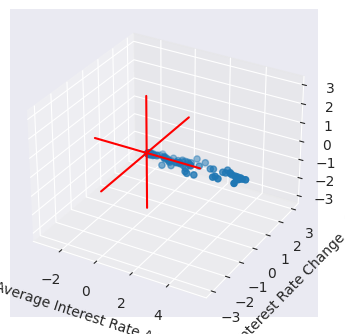

In [ ]:


sns.set_style ("darkgrid")

plot1 = three_day_info_not_null['Average Interest Rate Amount']
plot2 = three_day_info_not_null['interest_rate_change']
plot3 = three_day_info_not_null['3_day_after_change_rate']
plt.figure (figsize = (5, 4))
seaborn_plot = plt.axes (projection='3d')
print (type (seaborn_plot))
seaborn_plot.scatter3D (plot1, plot2, plot3)

seaborn_plot.plot(np.array([0, 0]), np.array([-3, 3]), np.array([0, 0]), color = 'red')
seaborn_plot.plot(np.array([-3, 3]), np.array([0, 0]), np.array([0, 0]), color = 'red')
seaborn_plot.plot(np.array([0, 0]), np.array([0, 0]), np.array([-3, 3]), color = 'red')

seaborn_plot.set_xlabel ('Average Interest Rate Amount')
seaborn_plot.set_ylabel ('Interest Rate Change')
seaborn_plot.set_zlabel ('3 Day After Change Rate')
plt.show ()

============ Examples =============


In [ ]:
(cleaned_treasury_bills_interest_rate['3_day_after_close'] - cleaned_treasury_bills_interest_rate['today_close']) / cleaned_treasury_bills_interest_rate['today_close']

0       0.039431
17           NaN
34           NaN
51     -0.019550
68      0.001151
          ...   
4358         NaN
4374   -0.011448
4392         NaN
4406         NaN
4435         NaN
Length: 274, dtype: float64

In [ ]:
treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='Record Date')

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,interest_rate_change,1_day_after,1_day_before,2_day_before,3_day_after,7_day_after,Close
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31,0.057,2023-11-01,2023-10-30,2023-10-29,2023-11-03,2023-11-07,418.200012
17,2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,30,0.061,2023-10-01,2023-09-29,2023-09-28,2023-10-03,2023-10-07,NaN
34,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31,0.100,2023-09-01,2023-08-30,2023-08-29,2023-09-03,2023-09-07,450.350006
51,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31,0.103,2023-08-01,2023-07-30,2023-07-29,2023-08-03,2023-08-07,457.790009
68,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30,0.125,2023-07-01,2023-06-29,2023-06-28,2023-07-03,2023-07-07,443.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31,-0.516,2001-06-01,2001-05-30,2001-05-29,2001-06-03,2001-06-07,125.949997
4374,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30,-0.293,2001-05-01,2001-04-29,2001-04-28,2001-05-03,2001-05-07,126.660004
4392,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31,-0.386,2001-04-01,2001-03-30,2001-03-29,2001-04-03,2001-04-07,NaN
4406,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,28,-0.304,2001-03-01,2001-02-27,2001-02-26,2001-03-03,2001-03-07,123.949997


In [ ]:
treasury_bills_interest_rate

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,interest_rate_change,1_day_after,1_day_before,2_day_before,3_day_after,7_day_after
0,2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31,0.057,2023-11-01,2023-10-30,2023-10-29,2023-11-03,2023-11-07
17,2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,30,0.061,2023-10-01,2023-09-29,2023-09-28,2023-10-03,2023-10-07
34,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31,0.100,2023-09-01,2023-08-30,2023-08-29,2023-09-03,2023-09-07
51,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31,0.103,2023-08-01,2023-07-30,2023-07-29,2023-08-03,2023-08-07
68,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30,0.125,2023-07-01,2023-06-29,2023-06-28,2023-07-03,2023-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31,-0.516,2001-06-01,2001-05-30,2001-05-29,2001-06-03,2001-06-07
4374,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30,-0.293,2001-05-01,2001-04-29,2001-04-28,2001-05-03,2001-05-07
4392,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31,-0.386,2001-04-01,2001-03-30,2001-03-29,2001-04-03,2001-04-07
4406,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,28,-0.304,2001-03-01,2001-02-27,2001-02-26,2001-03-03,2001-03-07


In [ ]:
treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='Record Date')
treasury_bills_interest_rate.rename(columns={"Close": "today_close"})

treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='1_day_after')
treasury_bills_interest_rate.rename(columns={"Close": "1_day_after_close"})

treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='1_day_before')
treasury_bills_interest_rate.rename(columns={"Close": "1_day_before_close"})

treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='2_day_before')
treasury_bills_interest_rate.rename(columns={"Close": "2_day_before_close"})

treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='3_day_after')
treasury_bills_interest_rate.rename(columns={"Close": "3_day_after_close"})

treasury_bills_interest_rate = treasury_bills_interest_rate.join(spy_close_value.set_index('Date'), on='7_day_after')
treasury_bills_interest_rate.rename(columns={"Close": "7_day_after_close"})

treasury_bills_interest_rate

ValueError: ignored

In [ ]:
treasury_bills_interest_rate.set_index('Record Date').join(spy_close_value.set_index('Date'))

,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,interest_rate_change,1_day_after,1_day_before,2_day_before,3_day_after,7_day_after,Close
Record Date,,,,,,,,,,,,,,,,,
2023-10-31,Marketable,Treasury Bills,5.437,1,2024,1,2023,4,10,31,0.057,2023-11-01,2023-10-30,2023-10-29,2023-11-03,2023-11-07,418.200012
2023-09-30,Marketable,Treasury Bills,5.380,1,2023,4,2023,3,9,30,0.061,2023-10-01,2023-09-29,2023-09-28,2023-10-03,2023-10-07,NaN
2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31,0.100,2023-09-01,2023-08-30,2023-08-29,2023-09-03,2023-09-07,450.350006
2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31,0.103,2023-08-01,2023-07-30,2023-07-29,2023-08-03,2023-08-07,457.790009
2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30,0.125,2023-07-01,2023-06-29,2023-06-28,2023-07-03,2023-07-07,443.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31,-0.516,2001-06-01,2001-05-30,2001-05-29,2001-06-03,2001-06-07,125.949997
2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30,-0.293,2001-05-01,2001-04-29,2001-04-28,2001-05-03,2001-05-07,126.660004
2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31,-0.386,2001-04-01,2001-03-30,2001-03-29,2001-04-03,2001-04-07,NaN


In [ ]:
treasury_bills_interest_rate['Record Date']

0       2023-10-31
17      2023-09-30
34      2023-08-31
51      2023-07-31
68      2023-06-30
           ...    
4358    2001-05-31
4374    2001-04-30
4392    2001-03-31
4406    2001-02-28
4435    2001-01-31
Name: Record Date, Length: 274, dtype: object

In [ ]:
type(treasury_bills_interest_rate['Record Date'])

pandas.core.series.Series

In [ ]:
treasury_bills_interest_rate['Record Date'].transform(lambda x: dt.datetime.fromisoformat(x))

0      2023-10-31
17     2023-09-30
34     2023-08-31
51     2023-07-31
68     2023-06-30
          ...    
4358   2001-05-31
4374   2001-04-30
4392   2001-03-31
4406   2001-02-28
4435   2001-01-31
Name: Record Date, Length: 274, dtype: datetime64[ns]

In [ ]:
treasury_bills_interest_rate['Record Date'].transform(lambda x: dt.datetime.fromisoformat(x).strftime("%Y-%m-%d"))[0]

'2023-10-31'

In [ ]:
dt.datetime.fromisoformat(treasury_bills_interest_rate['Record Date'][0])

datetime.datetime(2023, 10, 31, 0, 0)

In [ ]:
record_dates = dt.datetime.fromisoformat(treasury_bills_interest_rate['Record Date'])

TypeError: ignored

In [ ]:
type(treasury_bills_interest_rate['Record Date'][0])

str

In [ ]:
import datetime as dt

In [ ]:
record_date = dt.datetime.fromisoformat(treasury_bills_interest_rate['Record Date'][0])

In [ ]:
record_date

datetime.datetime(2023, 10, 31, 0, 0)

In [ ]:
record_date.isoformat()

'2023-10-31T00:00:00'

In [ ]:
record_date.strftime("%d/%m/%Y")

'31/10/2023'

In [ ]:
record_date.strftime("%Y-%m-%d")

'2023-10-31'

In [ ]:
day_change = dt.timedelta(days=7)

In [ ]:
day_change

datetime.timedelta(days=7)

In [ ]:
record_date + day_change

datetime.datetime(2023, 11, 7, 0, 0)

In [ ]:
record_date - day_change

datetime.datetime(2023, 10, 24, 0, 0)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


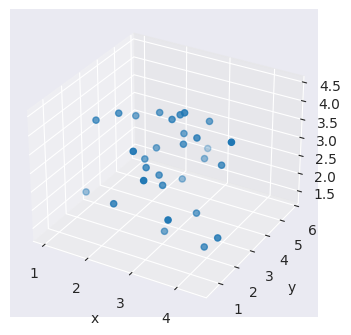

In [ ]:
# Seaborn example

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style ("darkgrid")
plot_mean = 3
min_num = 30
plot1 = np.random.normal (plot_mean, 1, size = min_num)
plot2 = np.random.normal (plot_mean, 1, size = min_num)
plot3 = np.random.normal (plot_mean, 1, size = min_num)
plt.figure (figsize = (5, 4))
seaborn_plot = plt.axes (projection='3d')
print (type (seaborn_plot))
seaborn_plot.scatter3D (plot1, plot2, plot3)
seaborn_plot.set_xlabel ('x')
seaborn_plot.set_ylabel ('y')
seaborn_plot.set_zlabel ('z')
plt.show ()